# Example Sheet 1 Question 3: getdist

See https://arxiv.org/pdf/1910.13970 and https://getdist.readthedocs.io/en/latest/intro.html.

Task overview: Generate samples from a 2D Gaussian distribution.

In [5]:
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import getdist
from getdist import plots, MCSamples

print("getdist version: %s, matplotlib version: %s" % (getdist.__version__, matplotlib.__version__))

getdist version: 1.7.3, matplotlib version: 3.10.7


In [9]:
# Make a random covariance matrix to use in sample generation

N_dim = 2
N_samples = 10000
random_state = np.random.default_rng(10)
A = random_state.random((N_dim, N_dim))
print(A)
cov = np.dot(A, A.T)
print(cov)
samps = random_state.multivariate_normal([0] * N_dim, cov, size=N_samples)
print(samps)

[[0.95600171 0.20768181]
 [0.82844489 0.14928212]]
[[0.957071   0.82299791]
 [0.82299791 0.70860608]]
[[ 0.24128304  0.2113882 ]
 [-0.83737585 -0.69472735]
 [-0.45813451 -0.40768876]
 ...
 [ 0.27984815  0.25342708]
 [ 3.11450995  2.66624169]
 [-1.61831222 -1.4150674 ]]


In [10]:
names = ["x%s" % i for i in range(N_dim)]
labels = ["x_%s" % i for i in range(N_dim)]
samples = MCSamples(samples=samps, names=names, labels=labels)

Removed no burn in


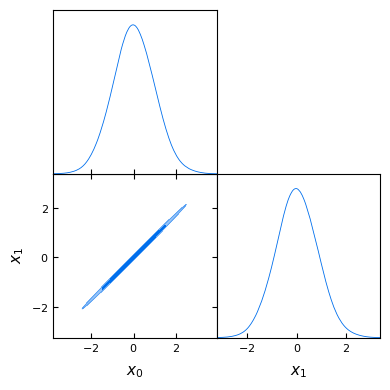

In [11]:
g = plots.get_subplot_plotter()
g.triangle_plot([samples], filled=True)

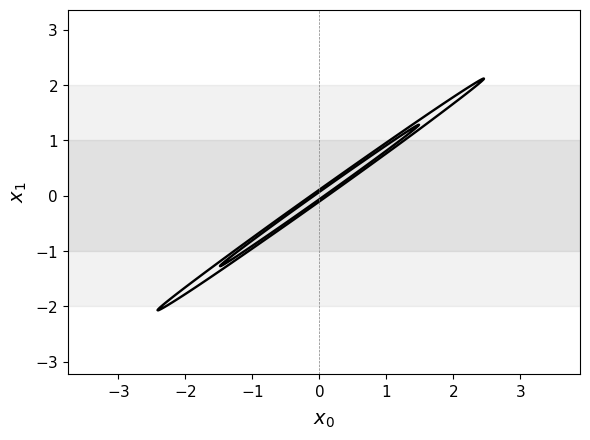

In [13]:
g = plots.get_single_plotter()
g.plot_2d([samples], "x0", "x1")
g.add_x_marker(0)
g.add_y_bands(0, 1)

(2, 1)

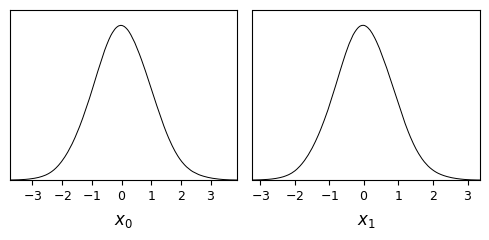

In [15]:
g = plots.get_subplot_plotter(width_inch=5)
g.plots_1d(samples, ["x0","x1"], nx=2)